# Insights from City Supply and Demand Data

## Objective

+ Find key insights on performance over the last two weeks

### Questions

#### Section 1: Completed Trips

1. Which date had the most completed trips during the two week period?
2. What was the highest number of completed trips within a 24 hour period?
3. What is the weighted average ratio of completed trips per driver during the two week period?

#### Section 2: Requests and Zeroes
1. Which hour of the day had the most requests during the two week period?
2. What percentages of all zeroes during the two week period occurred on weekend (Friday at 5 pm to Sunday at 3 am)? 
3. In drafting a driver schedule in terms of 8 hours shifts, when are the busiest 8 consecutive hours over the two week period in terms of unique requests? A new shift          starts in every 8 hours. Assume that a driver will work same shift each day.

#### Section 3: Supply & Demand + True or False
1. Looking at the data from all two weeks, which time might make the most sense to consider a true "end day" instead of midnight? (i.e when are supply and demand at both        their natural minimums)
2. In which 72 hour period is the ratio of Zeroes to Eyeballs the highest?
3. If you could add 5 drivers to any single hour of every day during the two week period, which hour should you add them to? 
4. True or False: There is exactly two weeks of data in this analysis
5. True or False: Driver supply always increases when demand increases during the two week period.

In [1]:
# importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# reading in the dataset and storing it under df
df = pd.read_csv('data/uber_data.csv')

# displaying a random sample of the data
df.sample(n = 5, random_state = 42)

,Date,Time (Local),Eyeballs,Zeroes,Completed Trips,Requests,Unique Drivers
72,2012-09-13,7,10,1,1,1,4
110,2012-09-14,21,49,6,8,9,17
298,2012-09-22,17,41,2,8,10,20
108,2012-09-14,19,46,6,9,10,15
277,2012-09-21,20,63,8,14,21,28


In [2]:
# looking at and understanding the data types and columns in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336 entries, 0 to 335
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Date             336 non-null    object
 1   Time (Local)     336 non-null    int64 
 2   Eyeballs         336 non-null    int64 
 3   Zeroes           336 non-null    int64 
 4   Completed Trips  336 non-null    int64 
 5   Requests         336 non-null    int64 
 6   Unique Drivers   336 non-null    int64 
dtypes: int64(6), object(1)
memory usage: 18.5+ KB


In [3]:
# getting a high level statistical summary of the numberic columns 
round(df.describe(),2)

,Time (Local),Eyeballs,Zeroes,Completed Trips,Requests,Unique Drivers
count,336.00,336.0,336.00,336.00,336.00,336.00
mean,11.50,19.9,4.25,4.06,5.53,7.90
std,6.93,16.9,5.80,5.67,7.40,5.88
min,0.00,0.0,0.00,0.00,0.00,0.00
25%,5.75,9.0,1.00,0.00,1.00,3.00
50%,11.50,17.0,3.00,2.00,3.00,8.00
75%,17.25,25.0,5.00,5.00,6.25,11.00
max,23.00,99.0,59.00,36.00,46.00,30.00


In [4]:
# understanding if there are any null values, but also how many
df.isnull().sum()

Date               0
Time (Local)       0
Eyeballs           0
Zeroes             0
Completed Trips    0
Requests           0
Unique Drivers     0
dtype: int64

## Section 1: Completed Trips

### Question 1: Which date had the most completed trips during the two week period?

#### Approach

+ Create a table grouped by the date and sum all trips that occurred in that date
+ Sort values by the date ascending
+ Create a visual to digest the information in an easier format
+ What about total trips completed/total requests (conversion)?
+ Does it tell the same story when it comes to conversion rates?

In [5]:
# creating a table grouped by the date with the total sum of completed trips and requests - sorting values by Date ascending
date_conversions = df.groupby('Date').agg({"Completed Trips" : "sum", "Requests" : "sum"}).reset_index().sort_values(by = 'Date', ascending = True)

# creating a new column calculating the conversion rate per day
date_conversions['conversion perc'] = round(date_conversions['Completed Trips'] / date_conversions['Requests'] * 100, 1)

# displaying the table
date_conversions.nlargest(1, 'Completed Trips')

,Date,Completed Trips,Requests,conversion perc
12,2012-09-22,248,344,72.1


## Creating the visual for the information above

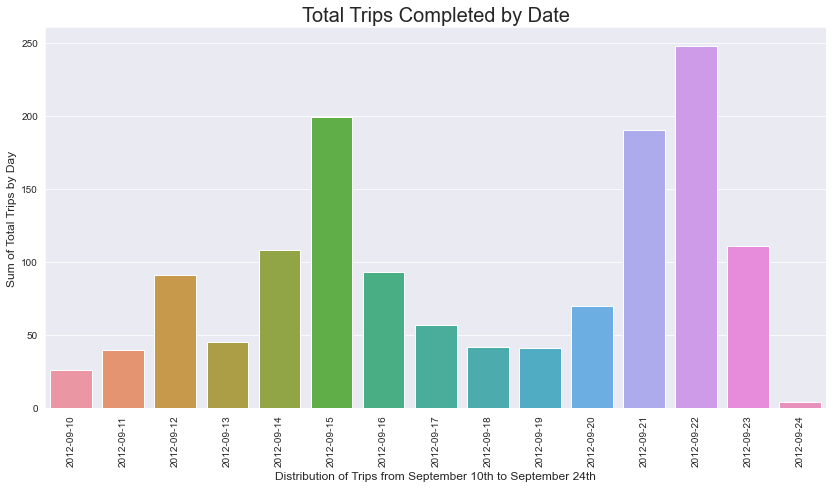

In [6]:
# setting plot style to dark grid
sns.set_style('darkgrid')

# defining font sizes for the plot elements
fontsize = 20
axfont = 12

# creating a figure and axis with a specified size
fig, ax = plt.subplots(figsize = (14, 7))

# plotting the data 
sns.barplot(x = 'Date', y = 'Completed Trips', data = date_conversions, ax = ax)

# updating the plot title and size
plt.title('Total Trips Completed by Date', fontdict = {'fontsize'  : fontsize})

# updating the y-axis and size
plt.ylabel('Sum of Total Trips by Day', fontdict = {'fontsize' : axfont})

# updating the x-axis and font size
plt.xlabel('Distribution of Trips from September 10th to September 24th', fontdict = {'fontsize' : axfont})

# rotating the x-values 90 degrees
plt.xticks(rotation = 90)

# displaying the plot
plt.show();

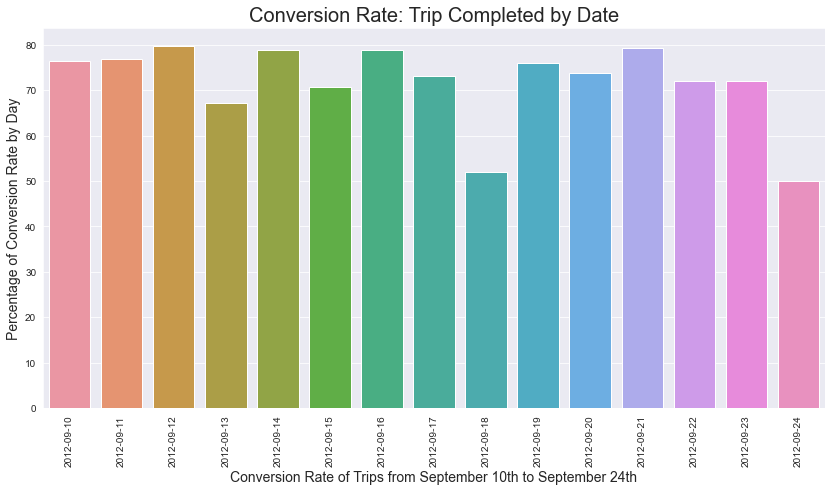

In [7]:
# setting plot style to darkgrid
sns.set_style('darkgrid')

# defining font sizes for plot elements
fontsize = 20
axfont = 14

# creating a figure and axis with a specified size
fig, ax = plt.subplots(figsize = (14, 7))

# plotting the data 
sns.barplot(x = 'Date', y = 'conversion perc', data = date_conversions, ax = ax)

# updating the plot title and size
plt.title('Conversion Rate: Trip Completed by Date', fontdict = {'fontsize'  : fontsize})

# updating the y-axis and size
plt.ylabel('Percentage of Conversion Rate by Day', fontdict = {'fontsize' : axfont})

# updating the x-axis and size
plt.xlabel('Conversion Rate of Trips from September 10th to September 24th', fontdict = {'fontsize' : axfont})

# rotating x-axis labels by 90 degrees
plt.xticks(rotation = 90)

# displaying the plot
plt.show();

## Section 1: Completed Trips

### Question 2: What was the highest number of completed trips within a 24 hour period?

#### Approach

+ In order to successfully answer this question, there is a need to create a window of 24 hours to ensure the data is added properly
+ Use pandas API FixedForwardWindowIndexer and using it to apply the rolling sum function

#### What is FixedForwardWindowIndexer?

+ Is a class used to create an indexer object that can be used to select a fixed forward window of a specified size from a pandas DataFrame or Series
+ In this case, the FixedForwardWindowIndexer is instantiated with a window_size parameter set to 24. This means that when this indexer object is used, it will select a fixed window of size 24 from the data
+ Once the window_size has been determined and stored in a variable, use the .rolling() function to sum calculate total completed trips in a 24 hour span

In [8]:
# creating a function to create a timestamp and use as an index
def create_timestamp(date, time):
    return pd.to_datetime(f"{date} {time}:00")

# applying the create_timestamp function
df['timestamp'] = df.apply(lambda row: create_timestamp(row['Date'], row['Time (Local)']), axis = 1)

# calculate rollings sums with 24 hours period using the pandas.api FixedForwardWindowIndexer function
indexer = pd.api.indexers.FixedForwardWindowIndexer(window_size=24)

# creating the new dataframe with the 24 hour rolling periods
agg_rolling_sum_trips = df.set_index('timestamp').rolling(indexer, min_periods = 1).sum()

In [9]:
# formatting the time format 
time_format = "%Y/%m/%d %H:%M"

# creating a new column named time interval
# it is a combination of the timestamp index and the 24 hour 
agg_rolling_sum_trips['Time Interval'] = agg_rolling_sum_trips.index.strftime(time_format) + "-" + (agg_rolling_sum_trips.index + pd.Timedelta('24H')).strftime(time_format)

# retrieving the row with the largest sum of completed trips within the 24 period
agg_rolling_sum_trips.nlargest(1, 'Completed Trips')

,Time (Local),Eyeballs,Zeroes,Completed Trips,Requests,Unique Drivers,Time Interval
timestamp,,,,,,,
2012-09-21 17:00:00,276.0,1015.0,207.0,278.0,367.0,349.0,2012/09/21 17:00-2012/09/22 17:00


## Section 1: Completed Trips

### Question 3: What is the weighted average ratio of completed trips per driver during the two week period?

#### What does weighted average mean?

+ Needs to account the total trip volume in each hour to determine the most accurate number for the whole day

#### Approach

+ Create a new column calculating the ratio of trip ratio per driver
+ We can do this by dividing completed trips / unique drivers
+ Filter out any instances where unique drivers equals 0 to avoid skewing in the data

In [10]:
# creating a new column calculating the trip ratio per unique driver
df['trip_ratio_per_driver'] = round(df['Completed Trips'] / df['Unique Drivers'], 2)

# displaying a random sample of the dataset
df.sample(n = 10, random_state = 42)

,Date,Time (Local),Eyeballs,Zeroes,Completed Trips,Requests,Unique Drivers,timestamp,trip_ratio_per_driver
72,2012-09-13,7,10,1,1,1,4,2012-09-13 07:00:00,0.25
110,2012-09-14,21,49,6,8,9,17,2012-09-14 21:00:00,0.47
298,2012-09-22,17,41,2,8,10,20,2012-09-22 17:00:00,0.40
108,2012-09-14,19,46,6,9,10,15,2012-09-14 19:00:00,0.60
277,2012-09-21,20,63,8,14,21,28,2012-09-21 20:00:00,0.50
42,2012-09-12,1,6,0,1,1,2,2012-09-12 01:00:00,0.50
229,2012-09-19,20,19,1,2,2,12,2012-09-19 20:00:00,0.17
283,2012-09-22,2,30,0,9,18,12,2012-09-22 02:00:00,0.75
302,2012-09-22,21,53,3,15,19,21,2012-09-22 21:00:00,0.71
140,2012-09-16,3,14,2,4,6,7,2012-09-16 03:00:00,0.57


In [11]:
# filtering the dataset for the null values
df[df['trip_ratio_per_driver'] == df['trip_ratio_per_driver'].isnull()]

,Date,Time (Local),Eyeballs,Zeroes,Completed Trips,Requests,Unique Drivers,timestamp,trip_ratio_per_driver
2,2012-09-10,9,8,3,0,0,14,2012-09-10 09:00:00,0.0
3,2012-09-10,10,9,2,0,1,14,2012-09-10 10:00:00,0.0
6,2012-09-10,13,9,1,0,0,9,2012-09-10 13:00:00,0.0
7,2012-09-10,14,12,1,0,0,9,2012-09-10 14:00:00,0.0
13,2012-09-10,20,11,1,0,0,5,2012-09-10 20:00:00,0.0
15,2012-09-10,22,16,3,0,2,4,2012-09-10 22:00:00,0.0
18,2012-09-11,1,3,2,0,1,3,2012-09-11 01:00:00,0.0
19,2012-09-11,2,1,1,0,0,1,2012-09-11 02:00:00,0.0
20,2012-09-11,3,1,1,0,0,1,2012-09-11 03:00:00,0.0
21,2012-09-11,4,1,1,0,0,1,2012-09-11 04:00:00,0.0


### What about instances where there were 0 Unique Drivers?

#### Next Steps

+ Remove the instances where no drivers were available and store it in a variable called filtered_data
+ It makes up 11.6% of the data
+ Calculate weighted average using the numpy average function

In [12]:
# looking for any potential null values in the dataset
round(len(df[df['Unique Drivers'] == 0])/len(df) * 100, 2)

11.61

In [13]:
# removing null values from the dataset
filtered_data = df[df['Unique Drivers'] > 0]

# displaying the filtered data
filtered_data 

,Date,Time (Local),Eyeballs,Zeroes,Completed Trips,Requests,Unique Drivers,timestamp,trip_ratio_per_driver
0,2012-09-10,7,5,0,2,2,9,2012-09-10 07:00:00,0.22
1,2012-09-10,8,6,0,2,2,14,2012-09-10 08:00:00,0.14
2,2012-09-10,9,8,3,0,0,14,2012-09-10 09:00:00,0.00
3,2012-09-10,10,9,2,0,1,14,2012-09-10 10:00:00,0.00
4,2012-09-10,11,11,1,4,4,11,2012-09-10 11:00:00,0.36
...,...,...,...,...,...,...,...,...,...
327,2012-09-23,22,17,2,2,2,6,2012-09-23 22:00:00,0.33
328,2012-09-23,23,9,3,3,3,3,2012-09-23 23:00:00,1.00
329,2012-09-24,0,7,2,1,2,2,2012-09-24 00:00:00,0.50
334,2012-09-24,5,4,2,1,1,3,2012-09-24 05:00:00,0.33


In [14]:
# calculating the weighted average using the np.average function
# the weight will be the completed trips column
weighted_average = round(np.average(filtered_data['trip_ratio_per_driver'], weights = filtered_data['Completed Trips']), 2)

# printing out answer statement
weighted_average

0.83

## Section 2: Requests and Zeroes

### Question 1: Which hour of the day had the most requests during the two week period?

#### Approach

+ Create a new column calculating the total number of requests by hour of day
+ Calculate total requests per Hour
+ Use the .nlargest function to retrieve the hour with the highest number of requests

In [15]:
# aggregating by hour and calculating the total number of requests
hour_totals = df.groupby('Time (Local)')['Requests'].sum().reset_index()

# retrieving the hour with the highest number of requests
hour_totals.nlargest(1, 'Requests')

,Time (Local),Requests
23,23,184


## Section 2: Requests and Zeroes

### Question 2: What percentages of all zeroes during the two week period occurred on the weekend (Friday 5 PM to Sunday at 3 AM)

#### Approach

+ It is a 24 Hour clock, that's important to keep in mind
+ Calculate total zeroes that occurred
+ From there, count all zeroes that occurred from Friday at 17:00 to Sunday at 03:00
+ Divide the weekend zeroes by the total number of zeroes to get the percentage

In [16]:
import datetime

# adding day of the week to the df using the .dt.dayofweek function
# 0 = Monday, 6 = Sunday
df['day'] = pd.to_datetime(df['Date']).dt.dayofweek

# calculating total zeroes in the dataset
total_zeroes = df['Zeroes'].sum()

# printing out the total sum of Zeroes in the dataset
print(total_zeroes)

# displaying a random sample of the data
df.sample(n = 10,  random_state = 42)

1429


,Date,Time (Local),Eyeballs,Zeroes,Completed Trips,Requests,Unique Drivers,timestamp,trip_ratio_per_driver,day
72,2012-09-13,7,10,1,1,1,4,2012-09-13 07:00:00,0.25,3
110,2012-09-14,21,49,6,8,9,17,2012-09-14 21:00:00,0.47,4
298,2012-09-22,17,41,2,8,10,20,2012-09-22 17:00:00,0.40,5
108,2012-09-14,19,46,6,9,10,15,2012-09-14 19:00:00,0.60,4
277,2012-09-21,20,63,8,14,21,28,2012-09-21 20:00:00,0.50,4
42,2012-09-12,1,6,0,1,1,2,2012-09-12 01:00:00,0.50,2
229,2012-09-19,20,19,1,2,2,12,2012-09-19 20:00:00,0.17,2
283,2012-09-22,2,30,0,9,18,12,2012-09-22 02:00:00,0.75,5
302,2012-09-22,21,53,3,15,19,21,2012-09-22 21:00:00,0.71,5
140,2012-09-16,3,14,2,4,6,7,2012-09-16 03:00:00,0.57,6


In [17]:
# filtering for all zeroes that occurred during the weekend and storing it in a variable
weekend_zeroes = df[(df['day'] == 4) & (df['Time (Local)'] >= 17) | (df['day'] == 5) | (df['day'] == 6) & (df['Time (Local)'] < 3)]['Zeroes'].sum()
        
# printing out total weekend_zeroes answer    
weekend_zeroes

# calculating the percentage of weekend zeroes and rounding to the second nearest decimal
pct_weekend_zeroes = round(weekend_zeroes / total_zeroes * 100, 2)

# printing out answer statement
print(f"The total percentage of Zeroes that occurred over the weekend is {pct_weekend_zeroes}%.")

The total percentage of Zeroes that occurred over the weekend is 44.86%.


## Section 2: Requests and Zeroes

### Question 3: In drafting a driver schedule in terms of 8 hours shifts, when are the busiest 8 consecutive hours over the two week period in terms of unique requests? A new shift starts in every 8 hours. Assume that a driver will work same shift each day.

#### Approach

+ Set the timestamp as the index
+ Use the pandas function [.resample()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.resample.html) function to resample the time series data
+ The data will be resampled by 8 hour blocks (00:00, 08:00, 16:00), then apply the .sum() function for values that fall within each specific time block

In [18]:
time_blocks_df = df.set_index('timestamp')['Requests'].resample('8H').sum().reset_index()

time_blocks_df.sample(n = 10, random_state = 42)

,timestamp,Requests
37,2012-09-22 08:00:00,91
24,2012-09-18 00:00:00,28
25,2012-09-18 08:00:00,18
36,2012-09-22 00:00:00,78
34,2012-09-21 08:00:00,28
39,2012-09-23 00:00:00,90
4,2012-09-11 08:00:00,6
12,2012-09-14 00:00:00,21
8,2012-09-12 16:00:00,41
3,2012-09-11 00:00:00,7


In [19]:
# getting the timestamp with the largest number of requests
time_blocks_df.nlargest(1, 'Requests')

,timestamp,Requests
35,2012-09-21 16:00:00,192


## Section 3: Supply & Demand

### Question 1: Looking at the data from all two weeks, which time might make the most sense to consider a true "end day" instead of midnight?

#### In other words, when are supply and demand at their natural minimums?

+ Needs to account dates and times
+ Look for minimum requests and drivers

#### Approach

+ For supply and demand, # of drivers and # of requests will be important to analyze
+ First step: Aggregate mininums by date
+ Join both the minimum # of drivers and minimum # of requests dataframes on the data
+ Aggregate mininums by time in order to find the natural minimums

In [20]:
# displaying a random sample of the dataset
df.sample(n = 10, random_state = 42)

,Date,Time (Local),Eyeballs,Zeroes,Completed Trips,Requests,Unique Drivers,timestamp,trip_ratio_per_driver,day
72,2012-09-13,7,10,1,1,1,4,2012-09-13 07:00:00,0.25,3
110,2012-09-14,21,49,6,8,9,17,2012-09-14 21:00:00,0.47,4
298,2012-09-22,17,41,2,8,10,20,2012-09-22 17:00:00,0.40,5
108,2012-09-14,19,46,6,9,10,15,2012-09-14 19:00:00,0.60,4
277,2012-09-21,20,63,8,14,21,28,2012-09-21 20:00:00,0.50,4
42,2012-09-12,1,6,0,1,1,2,2012-09-12 01:00:00,0.50,2
229,2012-09-19,20,19,1,2,2,12,2012-09-19 20:00:00,0.17,2
283,2012-09-22,2,30,0,9,18,12,2012-09-22 02:00:00,0.75,5
302,2012-09-22,21,53,3,15,19,21,2012-09-22 21:00:00,0.71,5
140,2012-09-16,3,14,2,4,6,7,2012-09-16 03:00:00,0.57,6


In [21]:
# aggregating the data by date and calculating the minimum number of unique drivers per date
min_drivers_day = df.groupby('Date')['Unique Drivers'].min().reset_index().rename({"Unique Drivers" : "min_drivers"}, axis = 1)

# aggregating the data by date and calculating the minimum number of customer requests
min_demand_day = df.groupby('Date')['Requests'].min().reset_index().rename({"Requests" : "min_demand"}, axis = 1)

In [22]:
# merging both dataframes on the date
supply_demand_df = pd.merge(min_drivers_day, min_demand_day, on = 'Date', how = 'left')

# displaying the merged dataframe
supply_demand_df

,Date,min_drivers,min_demand
0,2012-09-10,3,0
1,2012-09-11,0,0
2,2012-09-12,0,0
3,2012-09-13,0,0
4,2012-09-14,0,1
5,2012-09-15,0,0
6,2012-09-16,0,0
7,2012-09-17,0,0
8,2012-09-18,0,0
9,2012-09-19,0,0


### Next Steps

+ Merge the supply_demand_df with the original df to create a master dataframe

### Why is this important?

+ The date totals will merge to the hourly totals (the date is the unique identifier)
+ Therefore, this allows us to identify the natural minimums from a supply and demand perspective

### How do we calculate it?

+ The min_drivers and Unique Driver columns must have the same values
+ The min_demand and Requests columns must also have the same values
+ After that occurs, select the Time (Local) column from the filtered data
+ Apply the .mode() function to calculate the most frequently occurring value --> In other words, the natural minimums

In [23]:
# merging both the main daaframe and the supply_demand dataframe on the  date
supply_df = pd.merge(df, supply_demand_df, how = 'left', on = 'Date')

# displaying the first ten rows
supply_df.head(10)

,Date,Time (Local),Eyeballs,Zeroes,Completed Trips,Requests,Unique Drivers,timestamp,trip_ratio_per_driver,day,min_drivers,min_demand
0,2012-09-10,7,5,0,2,2,9,2012-09-10 07:00:00,0.22,0,3,0
1,2012-09-10,8,6,0,2,2,14,2012-09-10 08:00:00,0.14,0,3,0
2,2012-09-10,9,8,3,0,0,14,2012-09-10 09:00:00,0.00,0,3,0
3,2012-09-10,10,9,2,0,1,14,2012-09-10 10:00:00,0.00,0,3,0
4,2012-09-10,11,11,1,4,4,11,2012-09-10 11:00:00,0.36,0,3,0
5,2012-09-10,12,12,0,2,2,11,2012-09-10 12:00:00,0.18,0,3,0
6,2012-09-10,13,9,1,0,0,9,2012-09-10 13:00:00,0.00,0,3,0
7,2012-09-10,14,12,1,0,0,9,2012-09-10 14:00:00,0.00,0,3,0
8,2012-09-10,15,11,2,1,2,7,2012-09-10 15:00:00,0.14,0,3,0
9,2012-09-10,16,11,2,3,4,6,2012-09-10 16:00:00,0.50,0,3,0


In [24]:
# filtering for the local time based on two conditions, min_drivers is the same value as unique drivers and min_demand is the same value 
min_demand = supply_df[(supply_df['min_drivers'] == supply_df['Unique Drivers']) & (supply_df['min_demand'] == supply_df['Requests'])]['Time (Local)'].mode()

# displaying the hourly result for the natural minimum
min_demand[0]

4

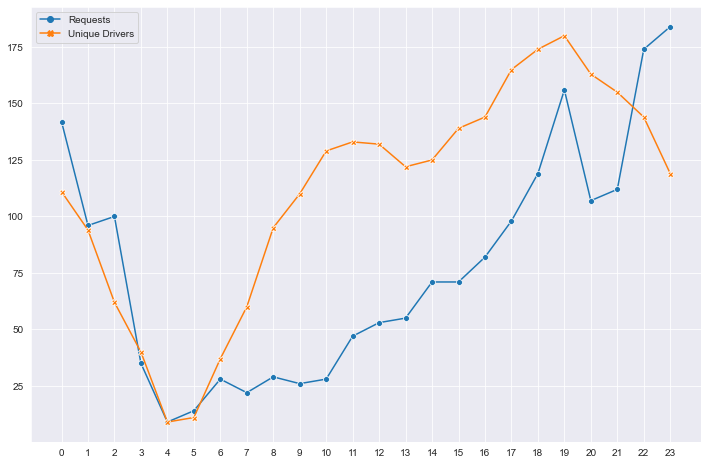

In [25]:
df_time_agg = df.groupby('Time (Local)').sum().reset_index()

plt.figure(figsize = (12,8))
fig = sns.lineplot(data = df_time_agg[['Requests', 'Unique Drivers']], markers=True, dashes=False)
fig.set_xticks(df_time_agg['Time (Local)'])

plt.show()

## Section 3: Supply & Demand

### Question 2: In which 72 hour period is the ratio of Zeroes to Eyeballs the highest?

#### Approach

+ In order to successfully answer this question, there is a need to create a window of 24 hours to ensure the data is added properly
+ Use pandas API FixedForwardWindowIndexer and using it to apply the rolling sum function
+ As done in Section 1: Question 2, we will use the FixedForwardWindowIndexer and set it to 72 to represent 72 hours
+ Apply the .rolling() sum function
+ In order to successfully answer this question, there is a need to create a window of 24 hours to ensure the data is added properly
+ Use pandas API FixedForwardWindowIndexer and then apply the .rolling() .sum() function

In [26]:
# calculate rollings sums with 72 hours period using the pandas.api FixedForwardWindowIndexer function
indexer = pd.api.indexers.FixedForwardWindowIndexer(window_size = 72)

# creating the new dataframe with the 24 hour rolling periods
eyes_three_day_agg = df.set_index('timestamp').rolling(indexer, min_periods = 1).sum().reset_index()

# calculating the ratio of zeroes to eyeballs and rounding it to the 3rd decimal point
eyes_three_day_agg['zeroes_to_eyeballs_ratio'] = round(eyes_three_day_agg['Zeroes'] / eyes_three_day_agg['Eyeballs'], 3)

# displaying the dataset
eyes_three_day_agg

,timestamp,Time (Local),Eyeballs,Zeroes,Completed Trips,Requests,Unique Drivers,trip_ratio_per_driver,day,zeroes_to_eyeballs_ratio
0,2012-09-10 07:00:00,828.0,956.0,172.0,159.0,211.0,473.0,20.78,93.0,0.180
1,2012-09-10 08:00:00,828.0,961.0,173.0,158.0,210.0,468.0,20.81,96.0,0.180
2,2012-09-10 09:00:00,828.0,964.0,174.0,157.0,209.0,462.0,20.79,99.0,0.180
3,2012-09-10 10:00:00,828.0,970.0,175.0,157.0,209.0,457.0,20.79,102.0,0.180
4,2012-09-10 11:00:00,828.0,976.0,176.0,159.0,210.0,453.0,20.99,105.0,0.180
...,...,...,...,...,...,...,...,...,...,...
331,2012-09-24 02:00:00,20.0,20.0,10.0,3.0,6.0,10.0,0.62,0.0,0.500
332,2012-09-24 03:00:00,18.0,17.0,7.0,3.0,4.0,10.0,0.62,0.0,0.412
333,2012-09-24 04:00:00,15.0,14.0,4.0,3.0,3.0,10.0,0.62,0.0,0.286
334,2012-09-24 05:00:00,11.0,13.0,3.0,3.0,3.0,10.0,0.62,0.0,0.231


### Important to mention

+ The code and data above is calculating a rolling sum for all of the timestamps in the dataset
+ This means that it is considering everything within in that 72 hour period. However, what happens to the latest timestamp we have in the dataset?
+ It does not have 72 hours worth of data to calculate, and that could skew the data
+ Therefore, it makes sense to remove any data from the dataset above that does not have 72 hours calculated from timestamps that exist

In [27]:
# fiitering the dataset to include only rows with timestamps that exist at the 72 hour mark
eyes_three_day_agg = eyes_three_day_agg[eyes_three_day_agg['timestamp'] <= (eyes_three_day_agg['timestamp'].max() - pd.Timedelta(days = 3))]

In [28]:
# defining the time format for the interval
time_format = "%Y/%m/%d %H:%M"

# creating a new column named time_interval that represents the time range of 72 hours for each row
eyes_three_day_agg['time_interval'] = eyes_three_day_agg['timestamp'].dt.strftime(time_format) + "-" + (eyes_three_day_agg['timestamp'] + pd.Timedelta('3 days')).dt.strftime(time_format)

# displaying the dataset
eyes_three_day_agg

<ipython-input-28-17addca2557f>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eyes_three_day_agg['time_interval'] = eyes_three_day_agg['timestamp'].dt.strftime(time_format) + "-" + (eyes_three_day_agg['timestamp'] + pd.Timedelta('3 days')).dt.strftime(time_format)


,timestamp,Time (Local),Eyeballs,Zeroes,Completed Trips,Requests,Unique Drivers,trip_ratio_per_driver,day,zeroes_to_eyeballs_ratio,time_interval
0,2012-09-10 07:00:00,828.0,956.0,172.0,159.0,211.0,473.0,20.78,93.0,0.180,2012/09/10 07:00-2012/09/13 07:00
1,2012-09-10 08:00:00,828.0,961.0,173.0,158.0,210.0,468.0,20.81,96.0,0.180,2012/09/10 08:00-2012/09/13 08:00
2,2012-09-10 09:00:00,828.0,964.0,174.0,157.0,209.0,462.0,20.79,99.0,0.180,2012/09/10 09:00-2012/09/13 09:00
3,2012-09-10 10:00:00,828.0,970.0,175.0,157.0,209.0,457.0,20.79,102.0,0.180,2012/09/10 10:00-2012/09/13 10:00
4,2012-09-10 11:00:00,828.0,976.0,176.0,159.0,210.0,453.0,20.99,105.0,0.180,2012/09/10 11:00-2012/09/13 11:00
...,...,...,...,...,...,...,...,...,...,...,...
259,2012-09-21 02:00:00,828.0,2209.0,465.0,535.0,724.0,780.0,39.17,352.0,0.211,2012/09/21 02:00-2012/09/24 02:00
260,2012-09-21 03:00:00,828.0,2207.0,468.0,534.0,724.0,775.0,38.97,348.0,0.212,2012/09/21 03:00-2012/09/24 03:00
261,2012-09-21 04:00:00,828.0,2207.0,468.0,534.0,725.0,775.0,38.97,344.0,0.212,2012/09/21 04:00-2012/09/24 04:00
262,2012-09-21 05:00:00,828.0,2208.0,469.0,534.0,725.0,775.0,38.97,340.0,0.212,2012/09/21 05:00-2012/09/24 05:00


### Time to calculate the answer

+ Using the .nlargest() function on the zeroes_to_eyeballs ratio column, the answer as to what period is the highest will be identified

In [29]:
eyes_three_day_agg.nlargest(1, 'zeroes_to_eyeballs_ratio')['zeroes_to_eyeballs_ratio']

118    0.293
Name: zeroes_to_eyeballs_ratio, dtype: float64

In [30]:
eyes_three_day_agg.nlargest(1, 'zeroes_to_eyeballs_ratio')['time_interval']

118    2012/09/15 05:00-2012/09/18 05:00
Name: time_interval, dtype: object

## Section 3: Supply & Demand

### Question 3: If you could add 5 drivers to any single hour of every day during the two week period, which hour should you add them to?

- Consider ride eyeballs and driver supply when choosing

#### Approach

+ Given the fact both eyeballs and driver supply need to be considered when choosing
+ From a logical standpoint, we want to add the 5 extra drivers to the busiest hours of the day with the highest eyeballs, but lowest drivers
+ To begin manipulating this data, let's aggregate the data the time column and sum all of the variables
+ Create a new column calculating the eyeball to driver ratio - Calculating total eyeballs divided by unique drivers
+ Finally, use the .nlargest() function to find the largest ratio by hour

In [31]:
# creating the dataset grouped by the hour, with all columns having the .sum() function applied to
eyeball_driver_ratio = df.groupby('Time (Local)').sum().reset_index()

# creating a new column calculating the ratio and rounding it to the second nearest decimal
eyeball_driver_ratio['eyeball to driver ratio'] = round(eyeball_driver_ratio['Eyeballs'] / eyeball_driver_ratio['Unique Drivers'], 2)

# displaying the dataset
eyeball_driver_ratio

,Time (Local),Eyeballs,Zeroes,Completed Trips,Requests,Unique Drivers,trip_ratio_per_driver,day,eyeball to driver ratio
0,0,339,81,102,142,111,8.51,42,3.05
1,1,207,43,71,96,94,7.55,42,2.20
2,2,170,52,61,100,62,7.58,42,2.74
3,3,83,30,21,35,40,2.13,42,2.08
4,4,29,21,2,9,9,2.00,42,3.22
5,5,42,31,4,14,11,inf,42,3.82
6,6,78,32,19,28,37,6.16,42,2.11
7,7,111,30,19,22,60,5.16,42,1.85
8,8,151,30,24,29,95,4.28,42,1.59
9,9,202,39,20,26,110,3.34,42,1.84


In [32]:
# now using the .nlargest() function to calculate the hour that has the highest ratio and could use the extra drivers
eyeball_driver_ratio.nlargest(1, 'eyeball to driver ratio')[['Time (Local)', 'eyeball to driver ratio']]

,Time (Local),eyeball to driver ratio
23,23,4.1


## Section 3: Supply & Demand

### Question 4: True/False: There is exactly two weeks of data in this analysis

#### Approach

+ Using the pandas.[Timedelta](https://pandas.pydata.org/docs/reference/api/pandas.Timedelta.html) function we are able to calculate the total duration time 
+ In essence, the Timedelta function represents a duration, the difference between two dates or times
+ Timedelta is the equivalent of python's datetime.timedelta and is interchangeable with it in most cases

In [33]:
df.sample(n = 10, random_state = 42)

,Date,Time (Local),Eyeballs,Zeroes,Completed Trips,Requests,Unique Drivers,timestamp,trip_ratio_per_driver,day
72,2012-09-13,7,10,1,1,1,4,2012-09-13 07:00:00,0.25,3
110,2012-09-14,21,49,6,8,9,17,2012-09-14 21:00:00,0.47,4
298,2012-09-22,17,41,2,8,10,20,2012-09-22 17:00:00,0.40,5
108,2012-09-14,19,46,6,9,10,15,2012-09-14 19:00:00,0.60,4
277,2012-09-21,20,63,8,14,21,28,2012-09-21 20:00:00,0.50,4
42,2012-09-12,1,6,0,1,1,2,2012-09-12 01:00:00,0.50,2
229,2012-09-19,20,19,1,2,2,12,2012-09-19 20:00:00,0.17,2
283,2012-09-22,2,30,0,9,18,12,2012-09-22 02:00:00,0.75,5
302,2012-09-22,21,53,3,15,19,21,2012-09-22 21:00:00,0.71,5
140,2012-09-16,3,14,2,4,6,7,2012-09-16 03:00:00,0.57,6


In [34]:
# getting the earliest timestamp in the dataset
min_date = df['timestamp'].min()

# getting the latest timestamp in the dataset
max_date = df['timestamp'].max()

# calculating the time difference by subtracting the max timestamp with the minimal timestamp
time_difference = max_date - min_date

# displaying the difference
time_difference

Timedelta('13 days 23:00:00')

### Results of the calculation / verifying results

+ The calculation between timestamp gave us 13 days, 2 hours
+ Basically one hour short of being exactly two weeks of data

### How can we verify it?

+ Using the pandas.Timedelta function
+ Create an object of 14 days, and compare it to the time_difference object
+ It will return a boolean True or False
+ If it's True - We have exactly two weeks of data and the time_difference object did not calculate correctly
+ If it's False - Verifies the time_difference calculation and we are in fact one hour short of exactly two weeks

In [35]:
# now creating a time object of 14 days and determining whether it is greater thab the time_difference object
pd.Timedelta('14 days') > time_difference

True

### The answer..

+ The answer is False, there are not exactly two weeks of data

## Section 3: Supply & Demand

### Question 5: True or False: Driver supply always increases when demand increases during the two week period.

#### Approach

+ Create an empty dataframe with only timestamps
+ Assume that requests are reoresenting the demand
+ Using the pandas .shift() function (Equivalent of LAG or LEAD in SQL), we can compare the request to the previous hour
+ To calculate the supply, we can also use the .shift() function to compare unique drivers as well
+ Subtract the current value to the previous hour to calculate difference in demand and supply
+ If demand is going up, ideally, so should supply

In [36]:
# creating a df with only timestamps
df_timestamp = pd.DataFrame(df[['timestamp', 'Requests', 'Unique Drivers']])

# shifting requests and unique drivers one row up, filling null values with 0 
df_timestamp[['previous_req', 'prev_supply']] = df[['Requests', 'Unique Drivers']].shift(-1).fillna(0).astype(int)

# displaying the data
df_timestamp

,timestamp,Requests,Unique Drivers,previous_req,prev_supply
0,2012-09-10 07:00:00,2,9,2,14
1,2012-09-10 08:00:00,2,14,0,14
2,2012-09-10 09:00:00,0,14,1,14
3,2012-09-10 10:00:00,1,14,4,11
4,2012-09-10 11:00:00,4,11,2,11
...,...,...,...,...,...
331,2012-09-24 02:00:00,2,0,1,0
332,2012-09-24 03:00:00,1,0,0,0
333,2012-09-24 04:00:00,0,0,1,3
334,2012-09-24 05:00:00,1,3,2,7


In [37]:
# calculating the difference between the current request and previous hours' requests
df_timestamp['demand_diff'] =  df_timestamp['previous_req'] - df_timestamp['Requests'] 

# calculating the difference between the current # of unique drivers available and previous hours' unique drivers available
df_timestamp['supply_diff'] =  df_timestamp['prev_supply'] -  df_timestamp['Unique Drivers']

# selecting the relevant columns for this question which are timestamp, demand_diff (difference in requests), and supply_diff (difference in unique drivers)
df_timestamp = df_timestamp[['timestamp', 'demand_diff', 'supply_diff']]

# displaying the data
df_timestamp

,timestamp,demand_diff,supply_diff
0,2012-09-10 07:00:00,0,5
1,2012-09-10 08:00:00,-2,0
2,2012-09-10 09:00:00,1,0
3,2012-09-10 10:00:00,3,-3
4,2012-09-10 11:00:00,-2,0
...,...,...,...
331,2012-09-24 02:00:00,-1,0
332,2012-09-24 03:00:00,-1,0
333,2012-09-24 04:00:00,1,3
334,2012-09-24 05:00:00,1,4


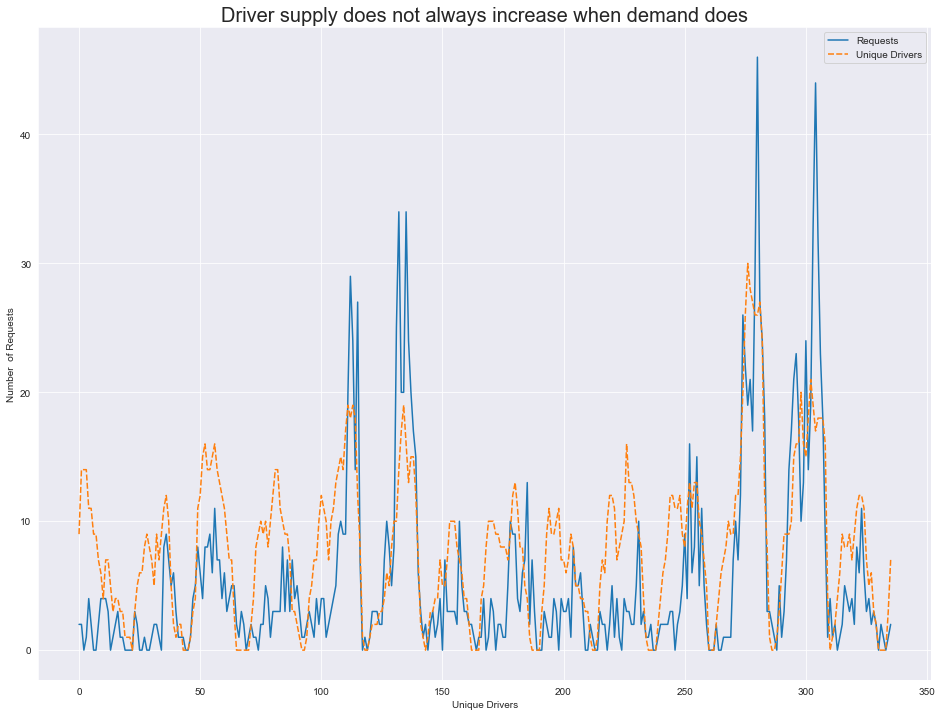

In [38]:
# creating a new figure with a size of 16x12 inches
plt.figure(figsize = (16,12))

# creating a line plot using seaborn using the the columns requests, unique drivers, timestamp
sns.lineplot(data = df[['Requests', 'Unique Drivers', 'timestamp']])

# renaming the titles and increasing the fontsize to 20
plt.title('Driver supply does not always increase when demand does', fontsize = 20)

# adding a title to the x-axis
plt.xlabel('Unique Drivers')

# adding a title to the y_axis
plt.ylabel('Number  of Requests')

# displaying the graph
plt.show();

### Takeaway

+ As we can see above, though supply seems to be fairly consistent, it does not always increase when demand does
+ Utilizing the [.all()](https://www.geeksforgeeks.org/python-all-function/) and [.item()](https://www.w3schools.com/python/ref_dictionary_items.asp) functions, we can run a boolean statement that will return True or False based on whether demand_diff and supply_diff are greater than 0 on the filtered rows
+ What is the .all() function? It is a method available in Python that is used to check if all elements in an iterable (e.g., a list, tuple, or pandas DataFrame) evaluate to True
+ What is the .item() function? Is used to extract the single value from a pandas DataFrame or a NumPy array when it contains only one element

In [39]:
# checking the demand_diff and supply_diff columns are all greater than 9
# if so, it will return True, otherwise, it will return as False

(df_timestamp[df_timestamp['demand_diff'] > 0]['supply_diff'] > 0).all().item()

False